# Navigating Flow Networks


In [1]:
# import numpy
import numpy as np

# import necessary landlab components
from landlab import RasterModelGrid
from landlab.components import FlowDirectorSteepest, FlowAccumulator

# import landlab plotting functionality
from landlab.plot.drainage_plot import drainage_plot

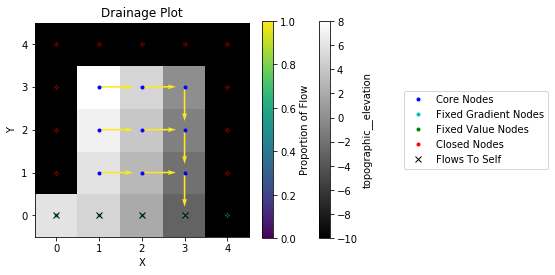

In [2]:
mg = RasterModelGrid((5,5), spacing=(1, 1))
mg.set_closed_boundaries_at_grid_edges(True, True, True, False)
z = mg.add_field('topographic__elevation',
                   mg.y_of_node + (6. - mg.x_of_node**2),
                   at = 'node')

fd = FlowDirectorSteepest(mg)
fd.run_one_step()

drainage_plot(mg)

In [3]:
# get the nodes that flow to themselves
nodes = np.arange(mg.number_of_nodes)
flow_to_self = np.where(mg.at_node['flow__receiver_node'] == nodes) [0]

print(flow_to_self)

[ 0  1  2  3  4  5  9 10 14 15 19 20 21 22 23 24]


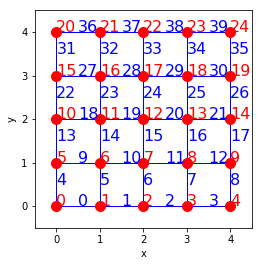

In [4]:
# plot the node and link ID numbers so that we can identify  the ID
# numbers correctly.

from landlab.plot.graph import plot_graph
plot_graph(mg, at='node,link')

In [5]:
# the flow direction gives information about the ID of the upstream node
fd.upstream_node_at_link

array([-1, -1, -1, -1, -1, -1, -1,  8, -1, -1,  6,  7, -1, -1, -1, -1, 13,
       -1, -1, 11, 12, -1, -1, -1, -1, 18, -1, -1, 16, 17, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [6]:
# and the downstream nodes
fd.downstream_node_at_link

array([-1, -1, -1, -1, -1, -1, -1,  3, -1, -1,  7,  8, -1, -1, -1, -1,  8,
       -1, -1, 12, 13, -1, -1, -1, -1, 13, -1, -1, 17, 18, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [7]:
# to get information about the flow network as a whole (rather than the
# local information only), we need to run the FlowAccumulator.

# get the nodes that are source terms. 
fa = FlowAccumulator(mg, flow_director=fd)
fa.run_one_step()


print(fa.headwater_nodes)

[ 6 11 16]


In [8]:
# if you want to process all nodes from downstream to upstream you can use
print(fa.upstream_ordered_nodes)

# you can reverse it if you need to go from upstream to downstream. 

[ 0  1  2  3  8  7  6 13 12 11 18 17 16  4  5  9 10 14 15 19 20 21 22 23 24]


In [9]:
# Allison, does Jon's model move sediment near the outlet first, or from tribs upwards. 
# When branching occurs, how does it handle it? (e.g. how does it know that.)

# 

In [10]:
# an equivalent datastructure exists for active links. 
fa.link_order_upstream

array([ 7, 11, 10, 16, 20, 19, 25, 29, 28])

In [11]:
#So if we wanted to work from upstream to downstream, moving from.

for source_link_id in fa.link_order_upstream[::-1]:
    
    upstream_node_id = fd.upstream_node_at_link[source_link_id]
    downstream_node_id = fd.downstream_node_at_link[source_link_id]
    downstream_link_id = fd.link_to_flow_receiving_node[fd.downstream_node_at_link[source_link_id]]
    
    print('source link ID: ' + str(source_link_id))
    print('   upstream node ID: ' + str(upstream_node_id))
    print('   donwstream node ID: ' + str(downstream_node_id))
    print('   destination link ID: ' + str(downstream_link_id))
    
    # this is where you would identify which packets presently located at link
    # with ID source_link_id should move. You'd then change the location in ItemCollection
    # to downstream_link_id.

source link ID: 28
   upstream node ID: 16
   donwstream node ID: 17
   destination link ID: 29
source link ID: 29
   upstream node ID: 17
   donwstream node ID: 18
   destination link ID: 25
source link ID: 25
   upstream node ID: 18
   donwstream node ID: 13
   destination link ID: 16
source link ID: 19
   upstream node ID: 11
   donwstream node ID: 12
   destination link ID: 20
source link ID: 20
   upstream node ID: 12
   donwstream node ID: 13
   destination link ID: 16
source link ID: 16
   upstream node ID: 13
   donwstream node ID: 8
   destination link ID: 7
source link ID: 10
   upstream node ID: 6
   donwstream node ID: 7
   destination link ID: 11
source link ID: 11
   upstream node ID: 7
   donwstream node ID: 8
   destination link ID: 7
source link ID: 7
   upstream node ID: 8
   donwstream node ID: 3
   destination link ID: -1
